CIFAR10 CNN IMAGE CLASSIFICATION

Net I: conv-pool-conv-pool-conv-pool-fc-fc | filter size: 3*3

170500096/170498071 [==============================] - 2s 0us/step
Epoch 1/20
313/313 [==============================] - 49s 154ms/step - loss: 1.9199 - accuracy: 0.2862 - val_loss: 1.4284 - val_accuracy: 0.4888
Epoch 2/20
313/313 [==============================] - 48s 154ms/step - loss: 1.3674 - accuracy: 0.5114 - val_loss: 1.2994 - val_accuracy: 0.5311
Epoch 3/20
313/313 [==============================] - 48s 155ms/step - loss: 1.1783 - accuracy: 0.5827 - val_loss: 1.1387 - val_accuracy: 0.6027
Epoch 4/20
313/313 [==============================] - 48s 153ms/step - loss: 1.0605 - accuracy: 0.6230 - val_loss: 1.0512 - val_accuracy: 0.6356
Epoch 5/20
313/313 [==============================] - 48s 153ms/step - loss: 0.9673 - accuracy: 0.6607 - val_loss: 1.0323 - val_accuracy: 0.6389
Epoch 6/20
313/313 [==============================] - 48s 153ms/step - loss: 0.8941 - accuracy: 0.6863 - val_loss: 1.0251 - val_accuracy: 0.6428
Epoch 7/20
313/313 [==============================] - 48s 152ms

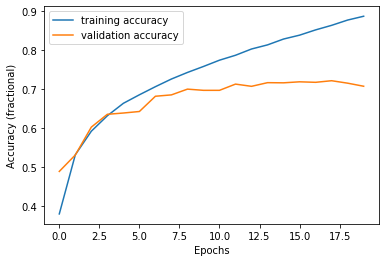

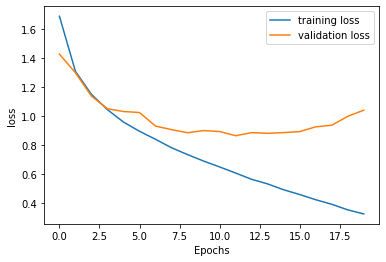

In [ ]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)


#create ANN model
#model constants

#define network
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Conv2D(64, kernel_size= 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')



Net II: Base architecture: conv-conv-pool-conv-pool-fc-fc | filter size: 5 * 5

Epoch 1/20
313/313 [==============================] - 273s 872ms/step - loss: 1.8229 - accuracy: 0.3244 - val_loss: 1.3865 - val_accuracy: 0.5027
Epoch 2/20
313/313 [==============================] - 271s 866ms/step - loss: 1.2777 - accuracy: 0.5413 - val_loss: 1.1745 - val_accuracy: 0.5899
Epoch 3/20
313/313 [==============================] - 271s 866ms/step - loss: 1.0836 - accuracy: 0.6158 - val_loss: 1.0891 - val_accuracy: 0.6234
Epoch 4/20
313/313 [==============================] - 270s 861ms/step - loss: 0.9329 - accuracy: 0.6721 - val_loss: 1.0030 - val_accuracy: 0.6432
Epoch 5/20
313/313 [==============================] - 270s 862ms/step - loss: 0.8216 - accuracy: 0.7099 - val_loss: 0.9091 - val_accuracy: 0.6894
Epoch 6/20
313/313 [==============================] - 270s 863ms/step - loss: 0.7105 - accuracy: 0.7493 - val_loss: 0.8844 - val_accuracy: 0.6958
Epoch 7/20
313/313 [==============================] - 270s 862ms/step - loss: 0.6303 - accuracy: 0.7793 - val_loss: 0.8760 -

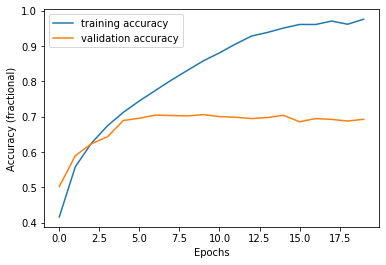

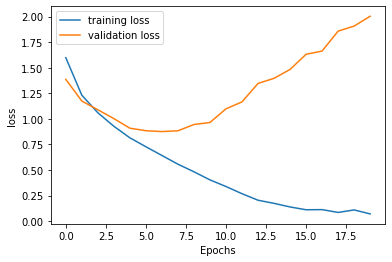

In [ ]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)


#create ANN model
#model constants

#define network
model = Sequential()
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Conv2D(64, kernel_size=5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')



NET III: Improved Network - deeper, with dropout and L2 regularization

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 11s 0us/step
Epoch 1/20
313/313 [==============================] - 521s 2s/step - loss: 2.3736 - accuracy: 0.1646 - val_loss: 1.8468 - val_accuracy: 0.3069
Epoch 2/20
313/313 [==============================] - 510s 2s/step - loss: 1.8374 - accuracy: 0.3155 - val_loss: 1.6097 - val_accuracy: 0.4246
Epoch 3/20
313/313 [==============================] - 518s 2s/step - loss: 1.6451 - accuracy: 0.4065 - val_loss: 1.4891 - val_accuracy: 0.4689
Epoch 4/20
313/313 [==============================] - 515s 2s/step - loss: 1.5493 - accuracy: 0.4540 - val_loss: 1.4719 - val_accuracy: 0.5038
Epoch 5/20
313/313 [==============================] - 514s 2s/step - loss: 1.4671 - accuracy: 0.4908 - val_loss: 1.3792 - val_accura

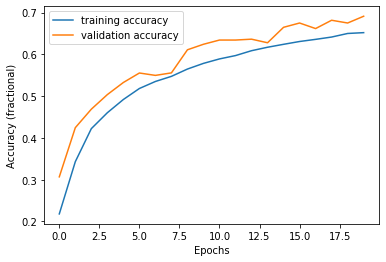

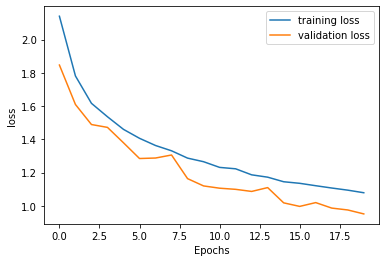

In [ ]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Conv3D
from keras import regularizers

#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)


#create ANN model
#model constants
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = Sequential()
model.add(Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(96, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(512, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(10, activation = 'softmax'))

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        2688      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 96)        83040     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       110720    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
______________________________________________________________

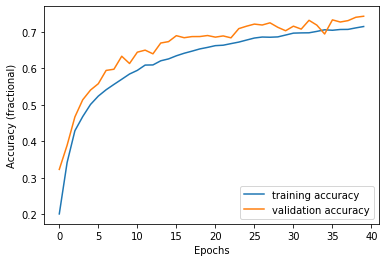

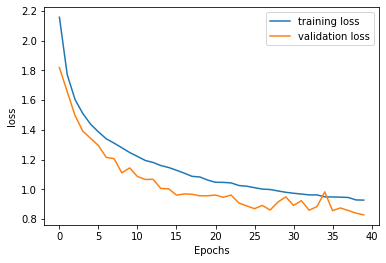

In [ ]:
predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')
